In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('ggplot')

The data
###########################################################



In [50]:
# Task:
# 1. fitting it to the periodic function
# 2. plot the fit
import numpy as np

temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])


Fitting it to a periodic function
###########################################################



In [6]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])

Plotting the fit
###########################################################



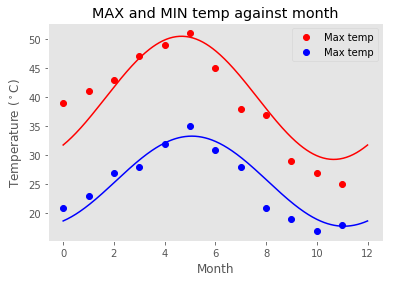

In [12]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'ro',label='Max temp')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo',label='Max temp')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.title("MAX and MIN temp against month")
plt.legend()
plt.grid(False)
plt.show()

In [49]:
#data to use:
import pandas as pd

url="https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
titanic = pd.read_csv(url)


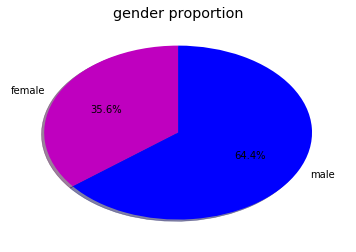

In [48]:
#1. Create a pie chart presenting the male/female proportion
temp=titanic.groupby('sex').count()['pclass']
proportions_list=[temp['female'],temp['male']]

temp.index
plt.pie(proportions_list, labels=temp.index,colors=['m','b'],startangle=90,shadow=True,autopct="%1.1f%%")
plt.title("gender proportion")
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

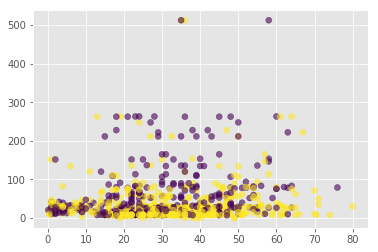

In [51]:
#2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender
plt.scatter(titanic.age,titanic.fare,alpha=0.6, c=pd.factorize(titanic['sex'])[0])
plt.show()